In [85]:
# Import section libraries

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.pyplot import rcParams
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [10]:
# Some settings

# PATH

PATH = '../../Raw Data sets/Sauti Africa Market Monitoring/eac-ratin.csv'

# Size of plottings

rcParams['figure.figsize'] = 20,6

In [11]:
prices = pd.read_csv(PATH)

In [12]:
prices.head()

,Market,Product,Country,Date,Retail (MT),Wholesale (MT),Currency
0,Bujumbura,Maize,Burundi,10/4/2011,0,548798,BIF
1,Bujumbura,Maize,Burundi,10/5/2011,0,549000,BIF
2,Bujumbura,Maize,Burundi,10/6/2011,0,498970,BIF
3,Bujumbura,Maize,Burundi,10/7/2011,0,549299,BIF
4,Bujumbura,Maize,Burundi,10/10/2011,0,549872,BIF


In [13]:
lira = prices[prices['Market'] == 'Lira']
lira['Date'] = pd.to_datetime(lira['Date'], infer_datetime_format=True)
lira = lira.set_index('Date')
lira = lira[['Wholesale (MT)']].astype(float) / 1000
lira = lira[lira.index >= '2010-12-31']
lira.head()

C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Wholesale (MT)
Date,
2011-03-04,499.489
2011-03-07,499.655
2011-03-10,500.561
2011-03-15,494.353
2011-03-21,498.928


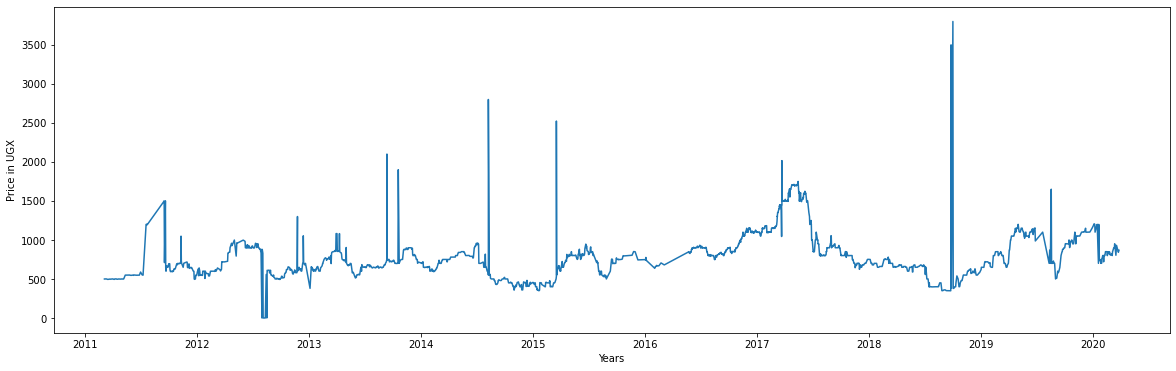

In [14]:

timeseries_prices = plt.plot(lira['Wholesale (MT)'], label = 'Maize Price')
# upper_band = plt.plot(month_rolmean + 2 * month_rolstd, color='red', label='Crisis band')
# lower_band = plt.plot(month_rolmean + 1.5 * month_rolstd, color='orange', label='Alert mean')
plt.xlabel('Years')
plt.ylabel('Price in UGX')
plt.show()



In [15]:
# I'm building a dataframe with all the possible dates between start='2/27/2011', end='3/28/2020'.

dummy = pd.DataFrame()
dummy['dates'] = pd.date_range(start='2/27/2011', end='3/28/2020')
dummy = dummy.set_index('dates')
lira = dummy.merge(lira, how='outer', left_index=True, right_index=True)
lira.head(25)

,Wholesale (MT)
2011-02-27,NaN
2011-02-28,NaN
2011-03-01,NaN
2011-03-02,NaN
2011-03-03,NaN
2011-03-04,499.489
2011-03-05,NaN
2011-03-06,NaN
2011-03-07,499.655
2011-03-08,NaN


In [117]:
# Searching to the outliers.

z = np.abs(stats.zscore(lira['Wholesale (MT)'], nan_policy='omit'))


dates_to_drop = [lira.iloc[i:i+1,:].index[0] for i in list(np.where(z>4)[0])]
lira = lira.drop(dates_to_drop, axis=0)

C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [118]:
lira['mean_price_7days'] = lira['Wholesale (MT)'].rolling(window=7,min_periods=1).mean()
# lira['std_price_7days'] = lira['Wholesale (MT)'].rolling(window=7,min_periods=2).std()

lira['number_of_day'] = [i%7 +1 for i in range(len(lira))]

# lira['difference'] = np.where(lira['Wholesale (MT)'] >= (lira['mean_price_7days'] + 2*lira['std_price_7days']), 'Yes','No' )
lira.head(25)

C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Wholesale (MT),mean_price_7days,number_of_day
2011-02-27,NaN,NaN,1
2011-02-28,NaN,NaN,2
2011-03-01,NaN,NaN,3
2011-03-02,NaN,NaN,4
2011-03-03,NaN,NaN,5
2011-03-04,499.489,499.489000,6
2011-03-05,NaN,499.489000,7
2011-03-06,NaN,499.489000,1
2011-03-07,499.655,499.572000,2
2011-03-08,NaN,499.572000,3


In [119]:
# looking for weeks with no values at all.

lira[lira['number_of_day'] == 7]['mean_price_7days'][lira[lira['number_of_day'] == 7]['mean_price_7days'].isnull()]

2011-05-21   NaN
2011-07-15   NaN
2011-07-29   NaN
2011-08-05   NaN
2011-08-12   NaN
2011-08-19   NaN
2011-08-26   NaN
2011-09-02   NaN
2011-09-09   NaN
2012-05-24   NaN
2015-02-08   NaN
2015-07-26   NaN
2015-09-06   NaN
2015-11-08   NaN
2015-11-15   NaN
2015-12-20   NaN
2015-12-27   NaN
2016-01-17   NaN
2016-01-24   NaN
2016-01-31   NaN
2016-03-13   NaN
2016-03-20   NaN
2016-03-27   NaN
2016-04-03   NaN
2016-04-10   NaN
2016-04-17   NaN
2016-04-24   NaN
2016-05-01   NaN
2016-05-08   NaN
2016-05-15   NaN
2016-05-22   NaN
2019-07-05   NaN
2019-07-12   NaN
2019-07-19   NaN
2019-08-02   NaN
Name: mean_price_7days, dtype: float64

In [121]:
# filling those gaps

weekly_lira = lira[lira['number_of_day'] == 7]['mean_price_7days'].interpolate()
weekly_lira

2011-03-05    499.489000
2011-03-12    500.108000
2011-03-19    494.353000
2011-03-26    498.218750
2011-04-02    500.078500
                 ...    
2020-02-28    824.239667
2020-03-05    813.414000
2020-03-12    882.302667
2020-03-19    894.993000
2020-03-26    842.071000
Name: mean_price_7days, Length: 536, dtype: float64

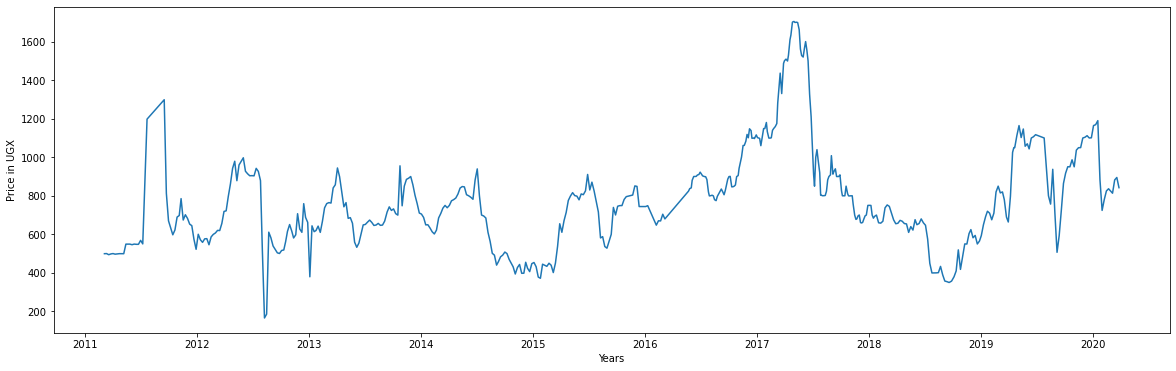

In [122]:
timeseries_prices = plt.plot(weekly_lira, label = 'Maize Price')
# upper_band = plt.plot(month_rolmean + 2 * month_rolstd, color='red', label='Crisis band')
# lower_band = plt.plot(month_rolmean + 1.5 * month_rolstd, color='orange', label='Alert mean')
plt.xlabel('Years')
plt.ylabel('Price in UGX')
plt.show()


In [123]:
# Augmented Dickey-Fuller test


'''
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root is that it determines how strongly a time series is defined by a trend.
'''


result_adft = adfuller(weekly_lira)
print(f'ADF Statistic: {round(result_adft[0],4)}')
print(f'p-value: {round(result_adft[1],4)}')
print('Critical Values:')
for key, value in result_adft[4].items():
    print(f'{key}: {round(value,4)}')

ADF Statistic: -3.5347
p-value: 0.0071
Critical Values:
1%: -3.4427
5%: -2.867
10%: -2.5697
